In [1]:
import littlefish.core.fish as fi
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.gridspec import GridSpec

random.seed(0)
np.random.seed(0)

In [2]:
simulation_length = 500
color_pre0 = "#CD5C5C"
color_pre1 = "#4169E1"
color_post = "#555555"

In [3]:
neuron_pre0 = fi.Neuron(baseline_rate=0.002)
neuron_pre1 = fi.Neuron(baseline_rate=0.002)
neuron_post = fi.Neuron(baseline_rate=0.002)
connection0 = fi.Connection(amplitude=0.8, latency=5, rise_time=2, decay_time=10)
connection1 = fi.Connection(amplitude=-0.7, latency=3, rise_time=1, decay_time=5)

In [4]:
psp_waveforms0 = np.zeros((1, simulation_length))
psp_waveforms1 = np.zeros((1, simulation_length))
action_history_pre0 = []
action_history_pre1 = []
action_history_post = []

for i in range(simulation_length):

    is_firing0 = neuron_pre0.act(i, action_history=action_history_pre0)
    if is_firing0:
        connection0.act(t_point=i, postsynaptic_index=0, psp_waveforms=psp_waveforms0)

    is_firing1 = neuron_pre1.act(i, action_history=action_history_pre1)
    if is_firing1:
        connection1.act(t_point=i, postsynaptic_index=0, psp_waveforms=psp_waveforms1)

    psp_waveforms = psp_waveforms0 + psp_waveforms1

    _ = neuron_post.act(i, action_history=action_history_post, probability_input=psp_waveforms[0, i])

(-180.0, 500.0)

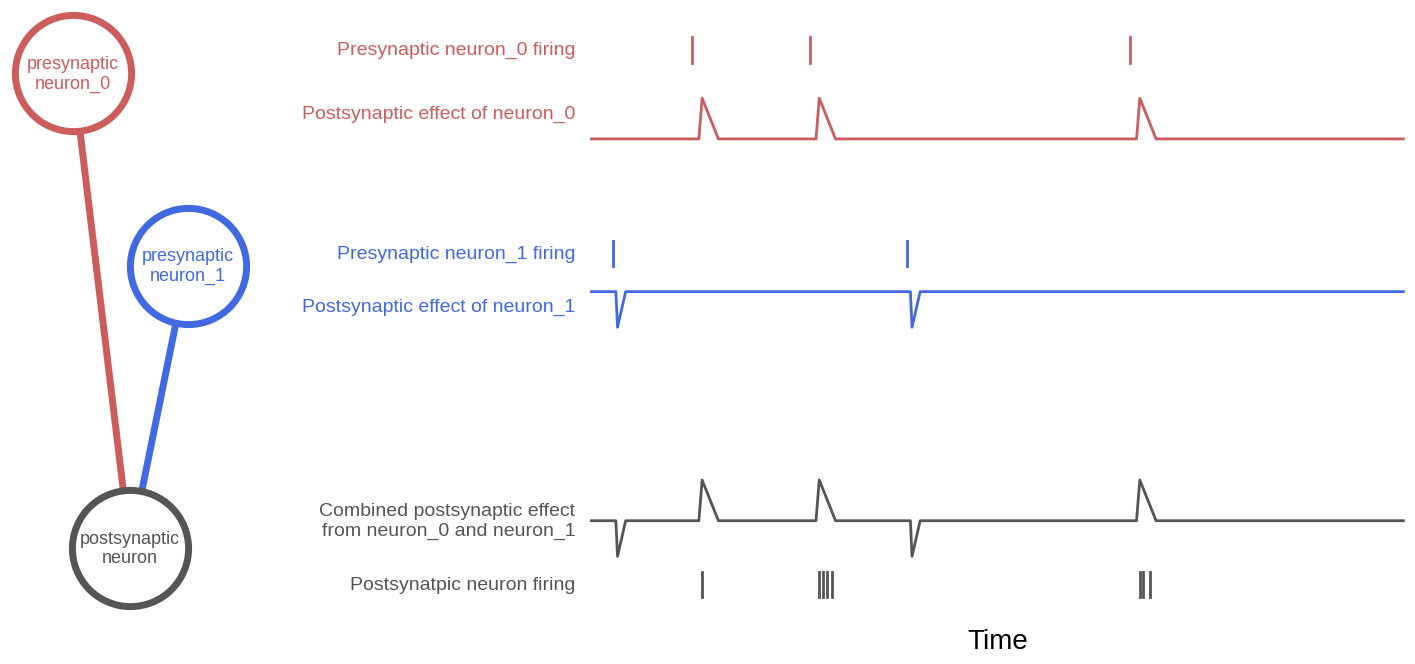

In [5]:
f = plt.figure(figsize=(18, 8))
gs = GridSpec(1, 5, figure=f)
ax0 = f.add_subplot(gs[0])
ax1 = f.add_subplot(gs[1:])

#plot connections
ax0.plot([-5, 0], [10.75, 1.5], ls="-", color=color_pre0, lw=5, zorder=1)
ax0.plot([5, 0], [7, 1.5], ls="-", color=color_pre1, lw=5, zorder=1)

# plot presynaptic neuron 0
ax0.scatter(-5, 10.75, s=7000, fc='#ffffff', ec=color_pre0, lw=5, zorder=2)

# plot presynaptic neuron 1
ax0.scatter(5, 7, s=7000, fc='#ffffff', ec=color_pre1, lw=5, zorder=2)

# plot postsynaptic neuron
ax0.scatter(0, 1.5, s=7000, fc='#ffffff', ec=color_post, lw=5, zorder=2)

# add text
ax0.text(-5, 10.75, "presynaptic\nneuron_0", color=color_pre0, fontsize=13, ha='center', va='center', family='Liberation Sans')
ax0.text(5, 7, "presynaptic\nneuron_1", color=color_pre1, fontsize=13, ha='center', va='center', family='Liberation Sans')
ax0.text(0, 1.5, "postsynaptic\nneuron", color=color_post, fontsize=13, ha='center', va='center', family='Liberation Sans')

ax0.set_xlim(-10.5, 10.5)
ax0.set_ylim(0, 12)
ax0.set_axis_off()

# plot presynaptic neuron 0
for t0 in action_history_pre0:
    ax1.plot([t0, t0], [11.5, 12], ls="-", color=color_pre0, lw=2)
ax1.plot(range(simulation_length), psp_waveforms0[0] + 10, ls="-", color=color_pre0, lw=2)

# plot presynaptic neuron 1
for t1 in action_history_pre1:
    ax1.plot([t1, t1], [7.5, 8], ls="-", color=color_pre1, lw=2)
ax1.plot(range(simulation_length), psp_waveforms1[0] + 7, ls="-", color=color_pre1, lw=2)

# plot postsynaptic neuron
ax1.plot(range(simulation_length), psp_waveforms[0] + 2.5, ls="-", color=color_post, lw=2)
for tp in action_history_post:
    ax1.plot([tp, tp], [1, 1.5], ls="-", color=color_post, lw=2)

ax1.set_axis_off()
ax1.text(simulation_length/2., 0, "Time", fontsize=20, ha="center", family='Liberation Sans')
ax1.text(-10, 11.75, "Presynaptic neuron_0 firing", fontsize=14, ha="right", va="center", color=color_pre0, family='Liberation Sans')
ax1.text(-10, 10.5, "Postsynaptic effect of neuron_0", fontsize=14, ha="right", va="center", color=color_pre0, family='Liberation Sans')
ax1.text(-10, 7.75, "Presynaptic neuron_1 firing", fontsize=14, ha="right", va="center", color=color_pre1, family='Liberation Sans')
ax1.text(-10, 6.7, "Postsynaptic effect of neuron_1", fontsize=14, ha="right", va="center", color=color_pre1, family='Liberation Sans')
ax1.text(-10, 2.5, "Combined postsynaptic effect\nfrom neuron_0 and neuron_1", fontsize=14, ha="right", va="center", color=color_post, family='Liberation Sans')
ax1.text(-10, 1.25, "Postsynatpic neuron firing", fontsize=14, ha="right", va="center", color=color_post, family='Liberation Sans')
ax1.set_xlim(-180, 500)